# Voltage Sag

This notebook shows the simulated voltage sag events, caused by motor starting.

In [1]:
import andes

In [2]:
!andes misc --version

Python  3.12.0
andes   1.9.3
numpy   1.26.0
kvxopt  1.3.2.1
sympy   1.13.3
scipy   1.13.1
pandas  2.2.2
numba   0.60.0


In [3]:
%matplotlib inline

In [4]:
andes.config_logger(stream_level=20)

In [5]:
ss = andes.load(andes.get_case('ieee14/ieee14_full.xlsx'),
                setup=False, no_output=True, default_config=True)

Working directory: "/Users/jinningwang/work/demo/demo/misc"
> Loaded generated Python code in "/Users/jinningwang/.andes/pycode".
Generated code for <PQ> is stale.
Numerical code generation (rapid incremental mode) started...


Generating code for 1 models on 12 processes.


Saved generated pycode to "/Users/jinningwang/.andes/pycode"
> Reloaded generated Python code of module "pycode".
Generated numerical code for 1 models in 0.0974 seconds.
Parsing input file "/Users/jinningwang/work/miniconda3/envs/amsre/lib/python3.12/site-packages/andes/cases/ieee14/ieee14_full.xlsx"...
Input file parsed in 0.1802 seconds.


<img src="./third-order-motor.png"
     alt="third-order-motor.png"
     width="500"
     caption="Third-order motor"
/>

<img src="./fifth-order-motor.png"
     alt="fifth-order-motor.png"
     width="500"
     caption="Fifth-order motor"
/>

Excerpted from _F. Milano, Power System Modelling and Scripting. Springer Nature, 2010._

Add a motor to Bus5, and a Toggle to start it at 0.1s.

In [6]:
ss.add(model='Motor5', param_dict=dict(bus=5, Vn=69, fn=60, u=0,
                                       name='Motor 1', idx='Motor5_1',
                                       rs=0.01, xs=0.15,
                                       rr1=0.05, xr1=0.15,
                                       rr2=0.001, xr2=0.04,
                                       xm=5, Hm=3,
                                       c1=0.1, c2=0.02, c3=0.02, zb=1))

ss.add(model='Toggle', param_dict=dict(model='Motor5', dev='Motor5_1', t=0.1))

'Toggle_1'

In [7]:
ss.setup()

System internal structure set up in 0.0400 seconds.


True

In [8]:
ss.PFlow.run()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0034 seconds.
0: |F(x)| = 0.5605182134
1: |F(x)| = 0.006202200332
2: |F(x)| = 5.819382825e-06
3: |F(x)| = 6.964193111e-12
Converged in 4 iterations in 0.0037 seconds.


True

In [9]:
ss.TDS.run()

Initialization for dynamics completed in 0.0187 seconds.
Initialization was successful.


  0%|          | 0/100 [00:00<?, ?%/s]

<Toggle Toggle_1>: Motor5.Motor5_1 status changed to 1 at t=0.1 sec.


Simulation to t=20.00 sec completed in 1.1106 seconds.


True

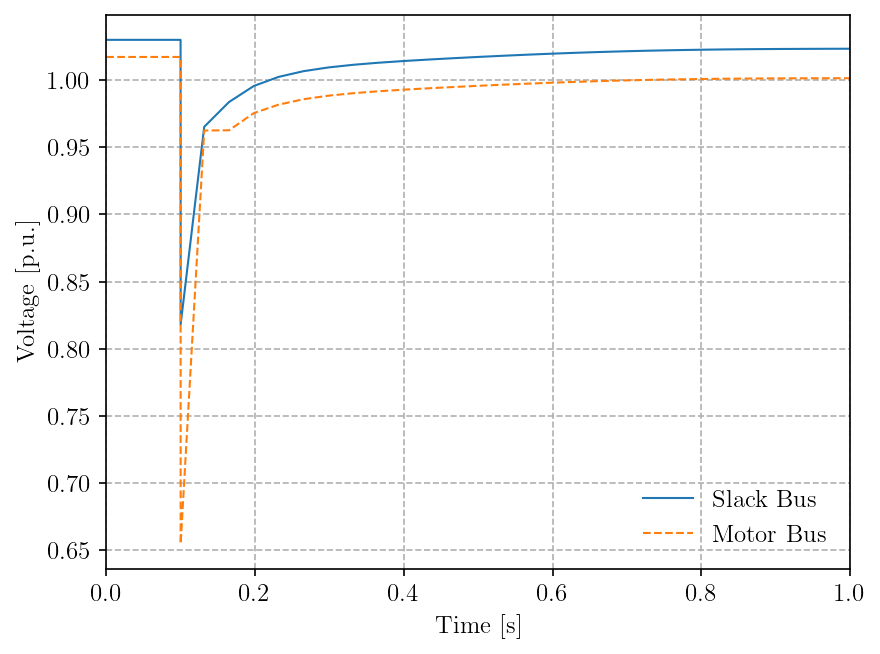

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Time [s]', ylabel='Voltage [p.u.]'>)

In [10]:
ss.TDS.plt.plot(ss.Bus.v,
                dpi=150,
                a=(0,4,),
                grid=True, ylabel='Voltage [p.u.]',
                yheader=['Slack Bus', 'Motor Bus'],
                right=1)